In [1]:
'''
#### these modules are required to run the script
module use /g/data/hh5/public/modules
module load conda/analysis3
source /scratch/nf33/public/hackathon_env/bin/activate
'''

import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
import numpy as np
%run ~/hackathon-2025_project/hk25-AusNode-land/analysis/yll_functions.ipynb

In [21]:
ds_pr

<xarray.Dataset>
Dimensions:          (time: 2920, cell: 49152, crs: 1, level: 25)
Coordinates:
  * crs              (crs) float64 nan
    lev              (level) int64 dask.array<chunksize=(25,), meta=np.ndarray>
  * time             (time) object 2019-09-01 00:00:00 ... 2020-08-31 21:00:00
Dimensions without coordinates: cell, level
Data variables: (12/31)
    clt              (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    hflsd            (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    hfssd            (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    hus              (time, level, cell) float32 dask.array<chunksize=(9, 2, 28680), meta=np.ndarray>
    huss             (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    lwcre            (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    ...               ...
    tas              (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    tauu             (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    tauv             (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    ts               (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    uas              (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>
    vas              (time, cell) float32 dask.array<chunksize=(17, 49152), meta=np.ndarray>

In [30]:
# define paths
datapath = '/g/data/qx55/SCREAM'
file_sm = datapath+'/scream_P1D_z6_v7.zarr'
file_pr = datapath+'/scream_PT3H_z6_v7.zarr'

file_landmask = '/g/data/qx55/germany_node/d3hp003.zarr/P1D_mean_z6_atm.zarr'
mask = xr.open_zarr(file_landmask).sftlf

# open the zarr file
ds_pr = xr.open_zarr(file_pr).sel(time=slice('2019-09','2020-08'))#.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
ds_pr_jja = ds_pr.sel(time=ds_pr['time'].dt.month.isin([6, 7, 8]))

ds_sm = xr.open_zarr(file_sm).sel(time=slice('2019-09','2020-08'))#.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
ds_sm_jja = ds_sm.sel(time=ds_sm['time'].dt.month.isin([6, 7, 8]))

pr_3hourly = ds_pr.pr
pr=pr_3hourly.resample(time='1D').mean()
pr_3hourly_jja = ds_pr_jja.pr
pr_jja=pr_3hourly_jja.resample(time='1D').mean()

lh_3hourly=ds_pr.hflsd
lh=lh_3hourly.resample(time='1D').mean()
lh_3hourly_jja=ds_pr_jja.hflsd
lh_jja=lh_3hourly_jja.resample(time='1D').mean()

sm = ds_sm.mrso
sm_jja = ds_sm_jja.mrso


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: merging cohorts
INFO:flox:Entering _validate_reindex: reindex is False
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: merging cohorts
INFO:flox:Entering _validate_reindex: reindex is False
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:find_group_cohorts: merging cohorts
INFO:flox:Entering _validate_reindex: reindex is False
INFO:flox:Leaving _validate_reindex: reindex is False
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_rei

In [31]:
sm_jja

<xarray.DataArray 'mrso' (time: 92, cell: 49152)>
dask.array<getitem, shape=(92, 49152), dtype=float32, chunksize=(56, 12288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-06-01 00:00:00 ... 2020-08-31 00:00:00
Dimensions without coordinates: cell
Attributes:
    cell_methods:   time: mean
    long_name:      soil liquid water + ice in top 10cm of soil (veg landunit...
    standard_name:  mass_content_of_water_in_soil_layer
    units:          kg/m2

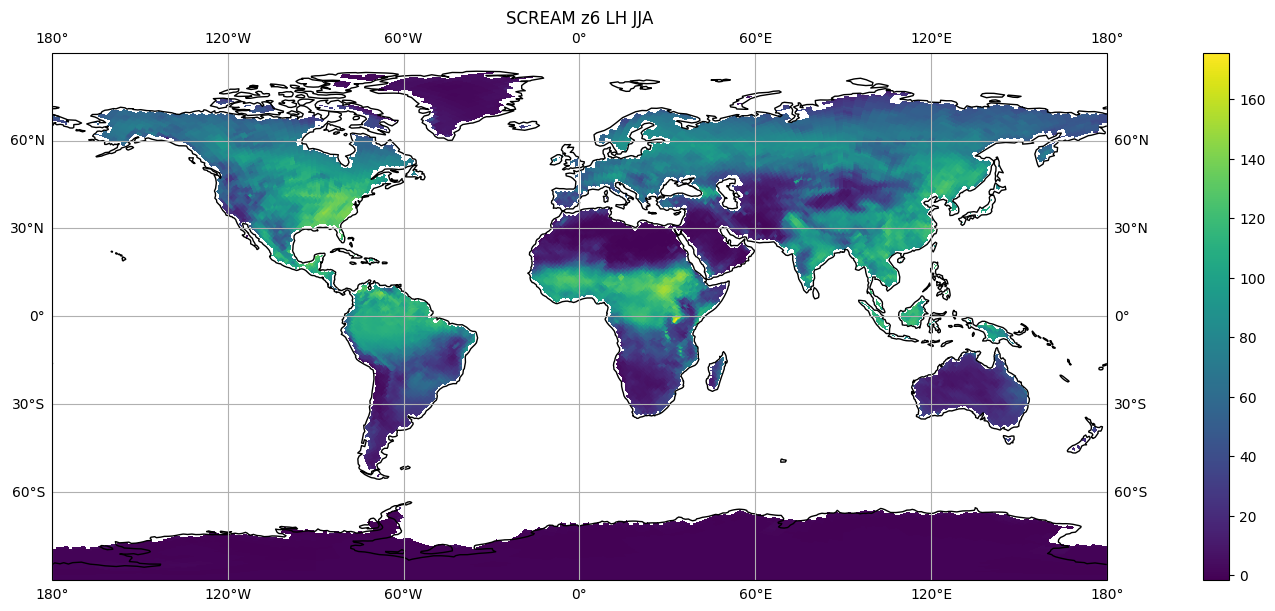

In [37]:
land = mask
lh_jja_mask = xr.where(land >0.9, lh_jja, np.nan)

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(lh_jja_mask.mean(dim='time').values,ax=ax)
ax.set_title(f'SCREAM z6 LH JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [34]:
land = mask
sm_jja_masked = xr.where(land >0.9, sm_jja, np.nan)
pr_jja_mask = xr.where(land >0.9, pr_jja, np.nan)
lh_jja_mask = xr.where(land >0.9, lh_jja, np.nan)


In [35]:
sm_jja_masked.mean(dim='time')

<xarray.DataArray (cell: 49152)>
dask.array<mean_agg-aggregate, shape=(49152,), dtype=float32, chunksize=(12288,), chunktype=numpy.ndarray>
Dimensions without coordinates: cell

In [39]:
mov_corr_sm_pr = corr_window(sm_jja_masked, pr_jja_mask, window_x=1, window_y=1).astype(np.float32)
mov_corr_sm_lh = corr_window(sm_jja_masked, lh_jja_mask, window_x=1, window_y=1).astype(np.float32)
mov_corr_lh_pr = corr_window(lh_jja_mask, pr_jja_mask, window_x=1, window_y=1).astype(np.float32)

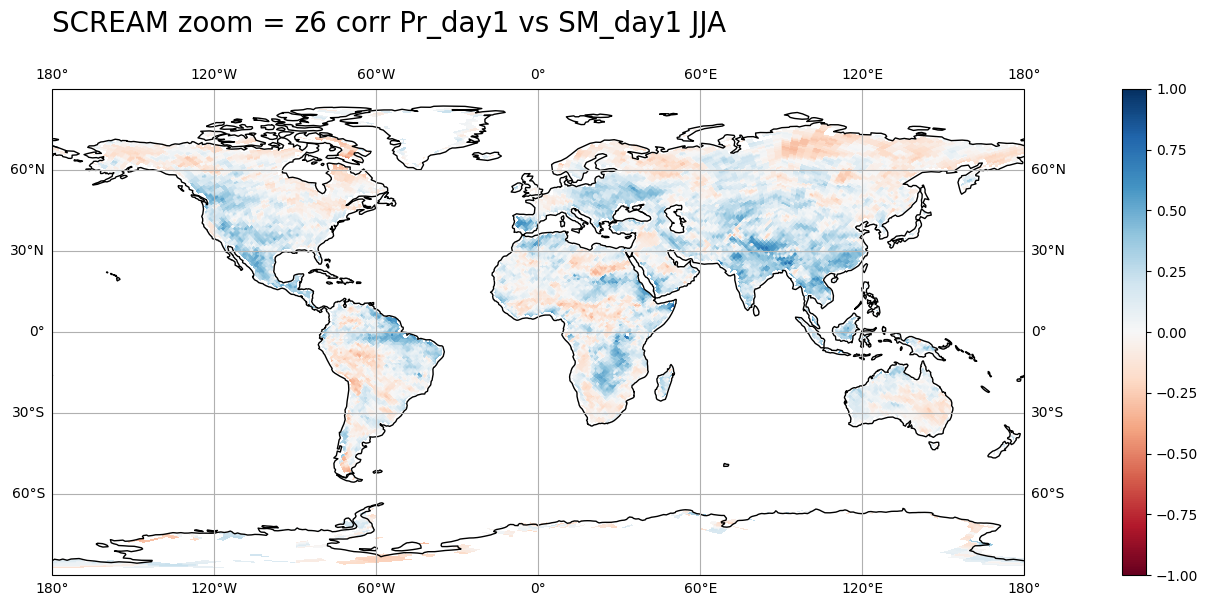

In [40]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'SCREAM zoom = z6 corr Pr_day1 vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


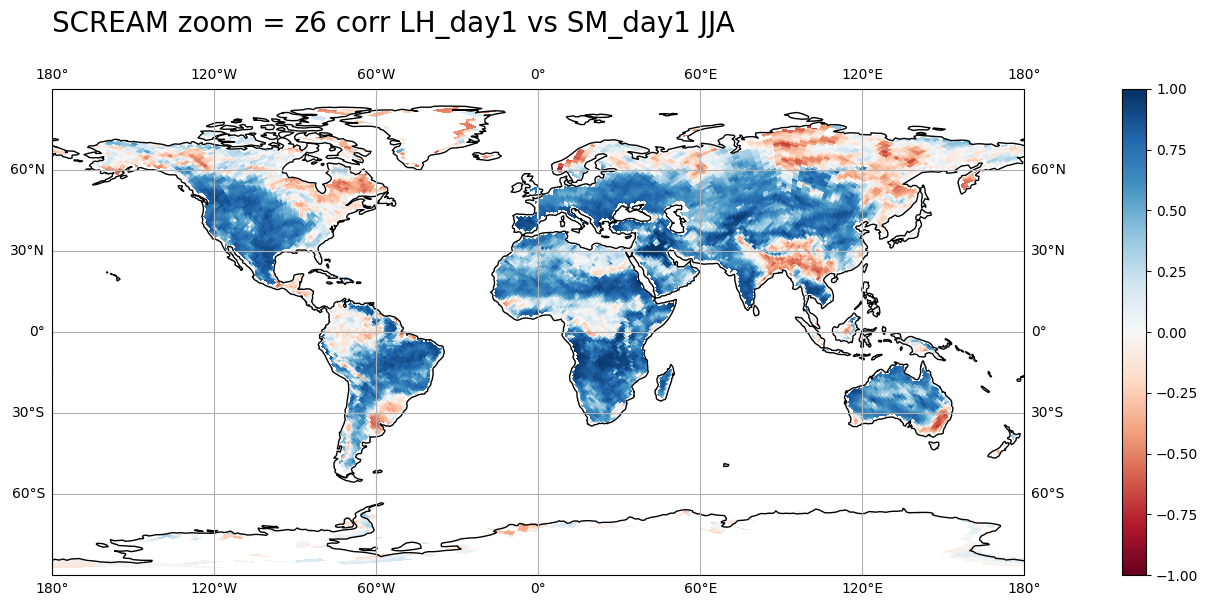

In [42]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_lh.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'SCREAM zoom = z6 corr LH_day1 vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


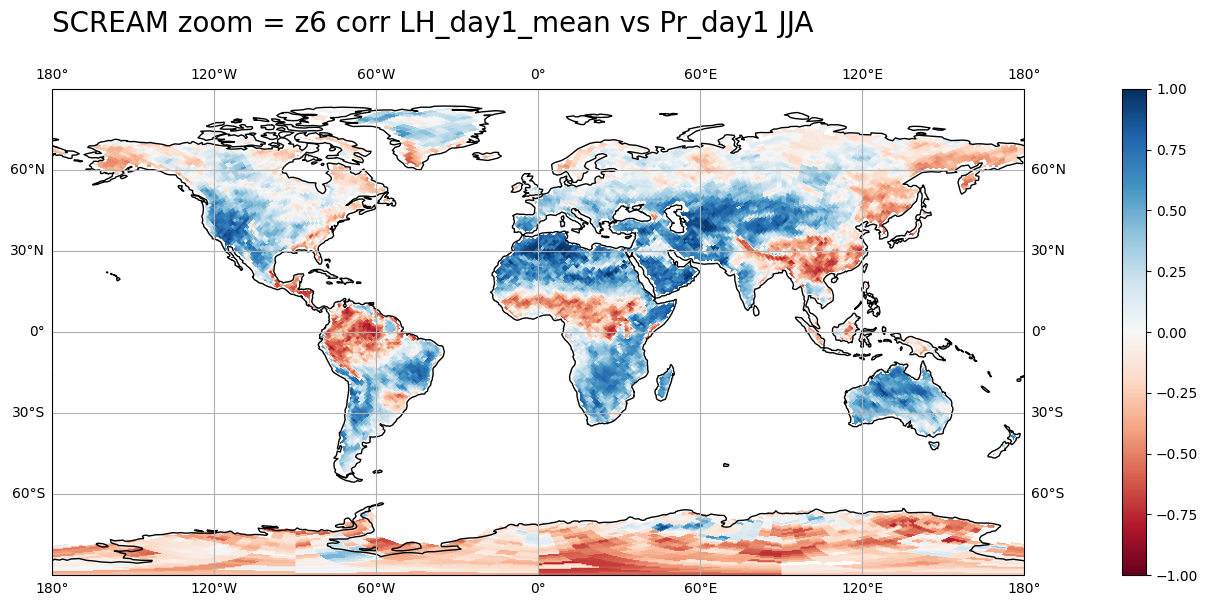

In [43]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_lh_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'SCREAM zoom = z6 corr LH_day1_mean vs Pr_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [44]:
mov_corr_sm_pr = corr_window(sm_jja_masked, pr_jja_mask, window_x=1, window_y=9).astype(np.float32)
mov_corr_sm_lh = corr_window(sm_jja_masked, lh_jja_mask, window_x=1, window_y=9).astype(np.float32)

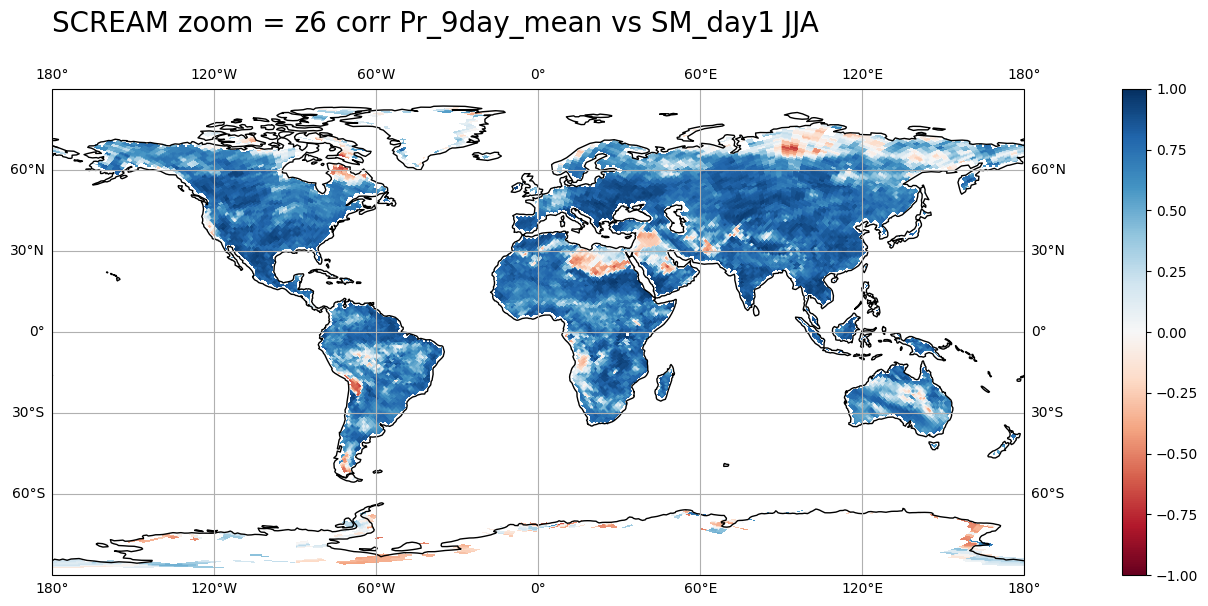

In [45]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'SCREAM zoom = z6 corr Pr_9day_mean vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


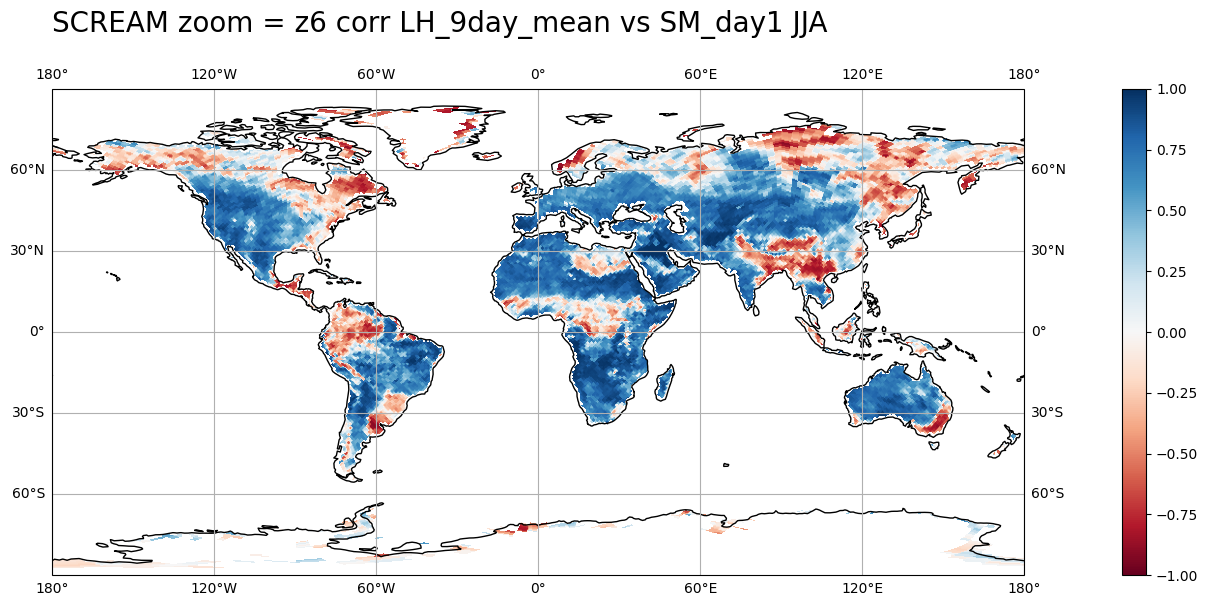

In [46]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_lh.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'SCREAM zoom = z6 corr LH_9day_mean vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()
